In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
pd.set_option('display.max_columns' ,None) 
pd.set_option('display.max_rows' ,None) 

In [26]:
data = pd.read_csv('cleaned_flats_version2')

In [27]:
data.head()

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0
1,1,1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not_available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,old_property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,650.0,0,0,0,0,0,1
2,2,2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not_available,"Sohna, Gurgaon, Haryana",12.0,NaN,new_property,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,595.0,0,0,0,0,0,0
3,3,3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,undefined,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,NaN,NaN,1200.0,1,0,0,0,0,0
4,4,4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,undefined,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",1345.0,NaN,NaN,1,0,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2997 non-null   int64  
 1   index                2997 non-null   int64  
 2   property_name        2997 non-null   object 
 3   society              2996 non-null   object 
 4   price                2996 non-null   float64
 5   price_per_sqft       2996 non-null   float64
 6   areaWithType         2997 non-null   object 
 7   bedRoom              2997 non-null   int64  
 8   bathroom             2997 non-null   int64  
 9   balcony              2997 non-null   int64  
 10  additionalRoom       2997 non-null   object 
 11  address              2991 non-null   object 
 12  floorNum             2989 non-null   float64
 13  facing               2123 non-null   object 
 14  agePossession        2997 non-null   object 
 15  nearbyLocations      2906 non-null   o

In [29]:
data.describe()

,Unnamed: 0,index,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
count,2997.000000,2997.000000,2996.000000,2996.000000,2997.000000,2997.000000,2997.000000,2989.000000,1934.00000,943.000000,1819.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,1501.701702,1502.134468,1.707270,9393.185581,2.798799,2.950617,2.730397,7.915691,1917.75985,2488.303403,2545.586535,0.160494,0.120787,0.052719,0.104771,0.333667,0.380380
std,867.674529,868.400986,1.398639,6550.384539,0.789550,1.042279,1.084876,6.195357,768.23467,23960.604418,23122.593570,0.367125,0.325934,0.223510,0.306310,0.471601,0.583589
min,0.000000,0.000000,0.160000,4.000000,1.000000,1.000000,0.000000,0.000000,89.00000,97.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,751.000000,751.000000,0.900000,6488.000000,2.000000,2.000000,2.000000,3.000000,1457.00000,1275.265000,872.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1500.000000,1500.000000,1.370000,8333.000000,3.000000,3.000000,3.000000,7.000000,1825.00000,1616.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2252.000000,2252.000000,2.030000,11111.000000,3.000000,4.000000,4.000000,11.000000,2215.00000,2000.000000,1763.865000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3008.000000,3027.000000,15.000000,200000.000000,6.000000,7.000000,4.000000,45.000000,10000.00000,737147.000000,607936.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [30]:
data.duplicated().sum()

0

In [31]:
data['property_name'].value_counts()

property_name
2 BHK Flat in Sohna                                125
3 BHK Flat in Sector 102 Gurgaon                    76
3 BHK Flat in Sector 65 Gurgaon                     57
3 BHK Flat in Sector 92 Gurgaon                     53
3 BHK Flat in Sector 69 Gurgaon                     51
2 BHK Flat in Sector 85 Gurgaon                     49
3 BHK Flat in Sector 83 Gurgaon                     47
3 BHK Flat in Sector 81 Gurgaon                     45
3 BHK Flat in Sector 109 Gurgaon                    44
3 BHK Flat in Sector 79 Gurgaon                     44
2 BHK Flat in Sector 107 Gurgaon                    38
3 BHK Flat in Sector 90 Gurgaon                     38
3 BHK Flat in Sector 37D Gurgaon                    38
3 BHK Flat in Sector 85 Gurgaon                     36
3 BHK Flat in Sector 70 Gurgaon                     36
2 BHK Flat in Sector 79 Gurgaon                     35
3 BHK Flat in Sector 86 Gurgaon                     34
4 BHK Flat in Sector 92 Gurgaon                    

In [32]:
data['society'].value_counts()

society
tulip violet                                     75
ss the leaf                                      74
shapoorji pallonji joyville gurugram             45
signature global park                            36
shree vardhman victoria                          35
dlf new town heights                             34
smart world orchard                              32
emaar mgf emerald floors premier                 32
smart world gems                                 32
dlf the ultima                                   31
paras dews                                       31
dlf regal gardens                                30
m3m woodshire                                    30
shree vardhman flora                             29
la vida by tata housing                          28
signature global solera                          27
godrej nature plus                               27
bptp terra                                       25
emaar gurgaon greens                             25
vati

In [33]:
import seaborn as sns

In [34]:
data[data['society'].isnull()]

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
2758,2767,2767,2 BHK Flat in Sector 78 Gurgaon,NaN,0.6,3692.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,not_available,"Gurgaon, Sector 78 Gurgaon, Gurgaon, Haryana",NaN,NaN,undefined,NaN,The property is under construction it's by rah...,[],NaN,"['Safety4 out of 5', 'Lifestyle4 out of 5', 'E...",NaN,1625.0,NaN,0,0,0,0,0,0


<Axes: xlabel='society'>

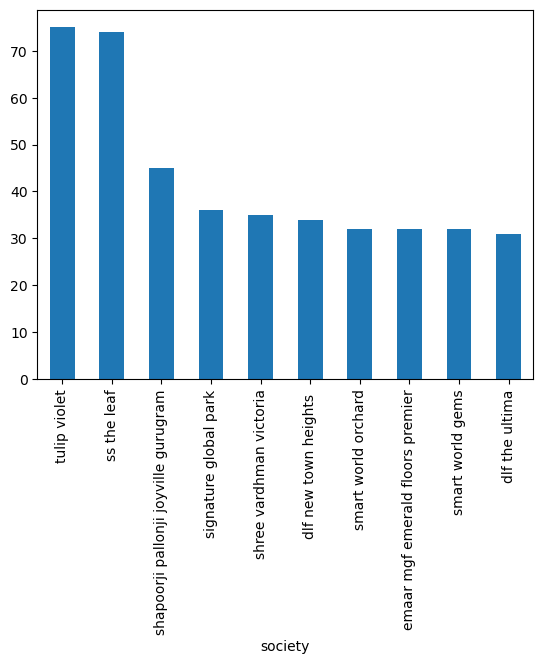

In [35]:
data['society'].value_counts().head(10).plot(kind = 'bar')

In [36]:
socity_counts = data['society'].value_counts()

repitation_of_society = {
    'high(>50)':((socity_counts>50).sum()),
    'Average(50-25)':(((socity_counts<=50 ) & (socity_counts>=25 )).sum()),
    'Below Average(25-10)' :(((socity_counts<25 ) & (socity_counts>=10 )).sum()),
    'low(<10)':((socity_counts>50).sum())
    
}
repitation_of_society

{'high(>50)': 2,
 'Average(50-25)': 17,
 'Below Average(25-10)': 73,
 'low(<10)': 2}

In [37]:
data['price'].describe()

count    2996.000000
mean        1.707270
std         1.398639
min         0.160000
25%         0.900000
50%         1.370000
75%         2.030000
max        15.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

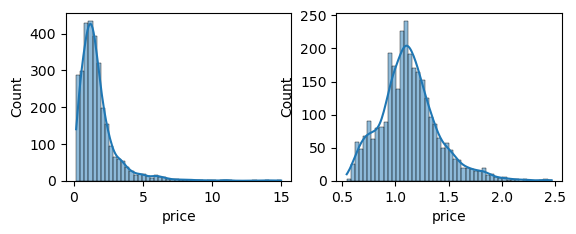

In [38]:
plt.subplot(2, 2, 1)
sns.histplot(x = (data['price']) , kde = True , bins = 50)
plt.subplot(2, 2, 2)
sns.histplot(np.cbrt(data['price']) , kde = True , bins = 50)

Text(0.5, 1.0, 'cube root transformer')

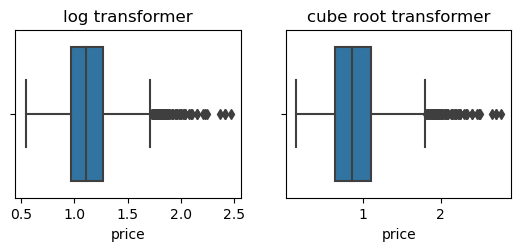

In [43]:
plt.subplot(2, 2, 1)
sns.boxplot(x = np.cbrt(data['price']))
plt.title('log transformer')
plt.subplot(2, 2, 2)
sns.boxplot(x = np.log1p(data['price']))
plt.title('cube root transformer')

In [40]:
print(f"skweness with log{np.log1p(data['price']).skew()} and skweness with cuberoot {np.cbrt(data['price']).skew()}")

skweness with log0.7919509732395402 and skweness with cuberoot 0.7023836215227739


price_per_sqft

In [47]:
data[data['price_per_sqft'].isnull()]

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
18,18,18,2 BHK Flat in Sector 93 Gurgaon,signature global orchard avenue 2,NaN,NaN,Carpet area: 577.11 (53.62 sq.m.),2,2,3,not_available,"L-1104, Sector 93 Gurgaon, Gurgaon, Haryana",11.0,East,undefined,"['Huda Metro Station', 'V3S Sapphire Ninety', ...",Looking for a budget-Friendly 2 bhk flat in a ...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,NaN,577.160318,0,0,0,0,0,0


In [78]:
data['price_per_sqft'].describe()

count      2996.000000
mean       9393.185581
std        6550.384539
min           4.000000
25%        6488.000000
50%        8333.000000
75%       11111.000000
max      200000.000000
Name: price_per_sqft, dtype: float64

In [67]:
data['price_per_sqft'].value_counts()

price_per_sqft
10000.0     19
8000.0      16
12500.0     16
6666.0      13
5000.0      13
7500.0      12
8333.0      12
6000.0      11
8461.0       9
12000.0      8
7000.0       8
9000.0       7
11111.0      6
5500.0       6
6578.0       6
8928.0       6
9230.0       6
11500.0      6
16000.0      5
6500.0       5
14242.0      5
8888.0       5
10714.0      5
8571.0       5
7142.0       5
5556.0       5
7692.0       5
4444.0       5
8205.0       5
5600.0       5
11428.0      5
4615.0       5
7407.0       5
5384.0       5
7641.0       5
4666.0       5
9822.0       4
8432.0       4
4500.0       4
6250.0       4
8043.0       4
8500.0       4
4854.0       4
11666.0      4
16666.0      4
13636.0      4
15000.0      4
8474.0       4
4687.0       4
8445.0       4
8784.0       4
13750.0      4
7317.0       4
15384.0      4
4814.0       4
7496.0       4
5660.0       4
8108.0       4
8139.0       4
13913.0      4
6735.0       4
8358.0       4
7272.0       4
9090.0       4
7250.0       4
10383.0   

3.156190151415145

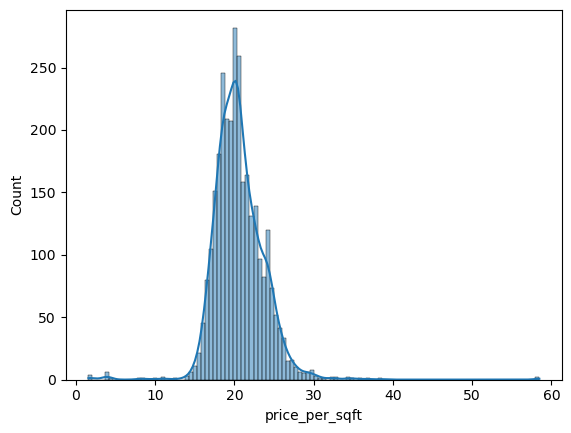

In [75]:
sns.histplot( x= np.cbrt(data['price_per_sqft']) , kde = True )
np.sqrt(data['price_per_sqft']).skew()
# required some changes because after applying the transformer not getting the value between the -1 to 1.

<Axes: xlabel='price_per_sqft'>

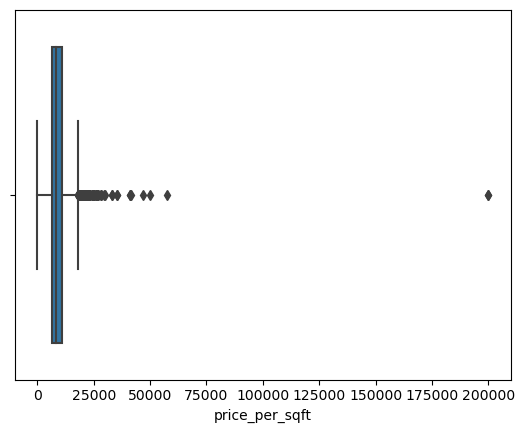

In [77]:
sns.boxplot(x = data['price_per_sqft'] )

In [80]:
data.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0


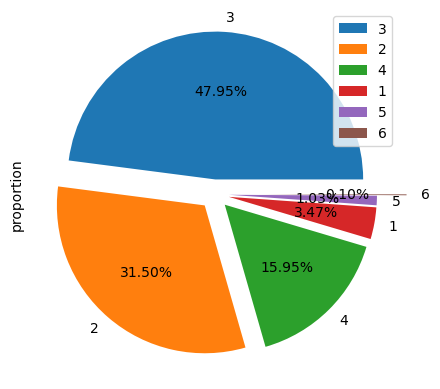

In [96]:
data['bedRoom'].value_counts(normalize = True).plot(kind = 'pie' , autopct = '%0.2f%%' , explode = [0.1 , 0.1,0.1,0.1,0.1,0.3 ])
plt.legend()

In [106]:
data['bathroom'].isnull().sum()

0

In [107]:
data['bathroom'].value_counts()

bathroom
2    1044
3     989
4     636
5     169
1     112
6      42
7       5
Name: count, dtype: int64

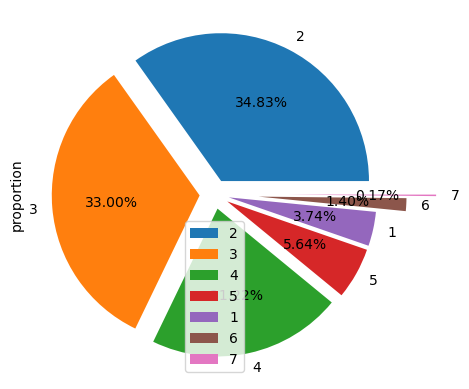

In [99]:
data['bathroom'].value_counts(normalize = True).plot(kind = 'pie' , autopct = '%0.2f%%' , explode = [0.1 , 0.1,0.1,0.1,0.1,0.3 , 0.5 ])
plt.legend()

In [108]:
data['balcony'].isnull().sum()

0

In [109]:
data['balcony'].value_counts()

balcony
3    974
4    862
2    749
1    315
0     97
Name: count, dtype: int64

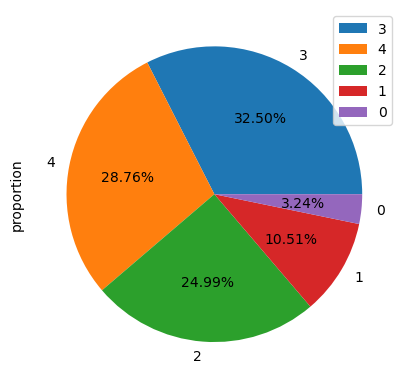

In [101]:
data['balcony'].value_counts(normalize = True).plot(kind = 'pie' , autopct = '%0.2f%%' )
plt.legend()

In [110]:
data.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0


In [114]:
data.drop(columns = 'additionalRoom' , inplace = True , axis = 1)

In [115]:
data.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0


In [117]:
data['floorNum'].isnull().sum()

8

In [118]:
data['floorNum'].describe()

count    2989.000000
mean        7.915691
std         6.195357
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        45.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

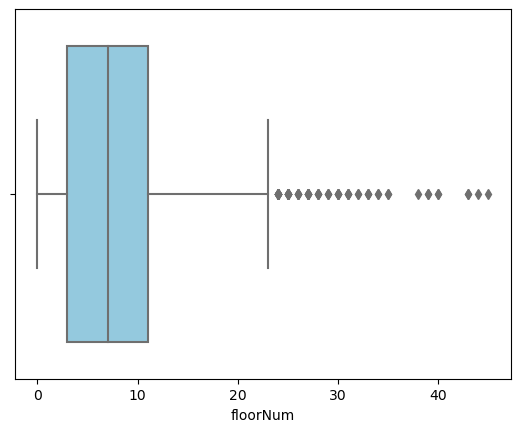

In [121]:
sns.boxplot( x  = data['floorNum'] , color = 'skyblue')

<Axes: xlabel='floorNum'>

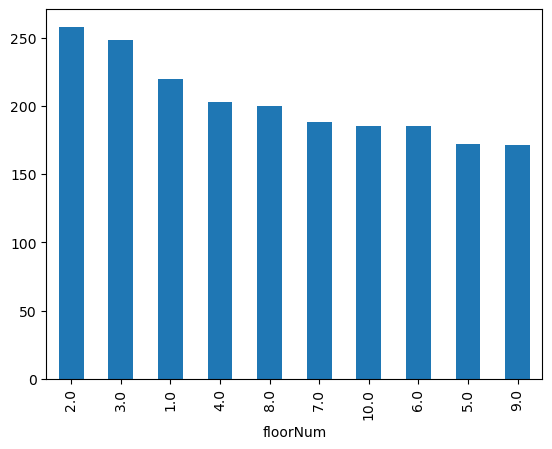

In [124]:
data['floorNum'].value_counts().head(10).plot(kind  = 'bar' )

In [126]:
data['facing'].isnull().sum()

874

In [127]:
data['facing'].value_counts()

facing
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [129]:
data.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0


In [132]:
data['agePossession'].isnull().sum()

0

<Axes: xlabel='agePossession'>

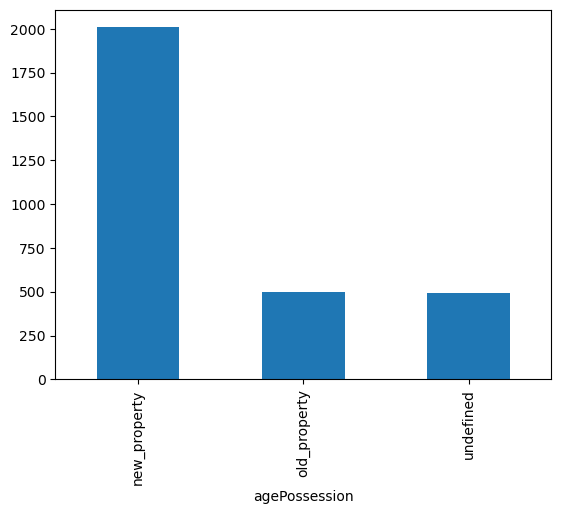

In [134]:
data['agePossession'].value_counts().plot(kind  = 'bar')

analysis of builtup areas

In [136]:
data['super_built_up_area'].isnull().sum()

1063

In [137]:
data['super_built_up_area'].describe()

count     1934.00000
mean      1917.75985
std        768.23467
min         89.00000
25%       1457.00000
50%       1825.00000
75%       2215.00000
max      10000.00000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

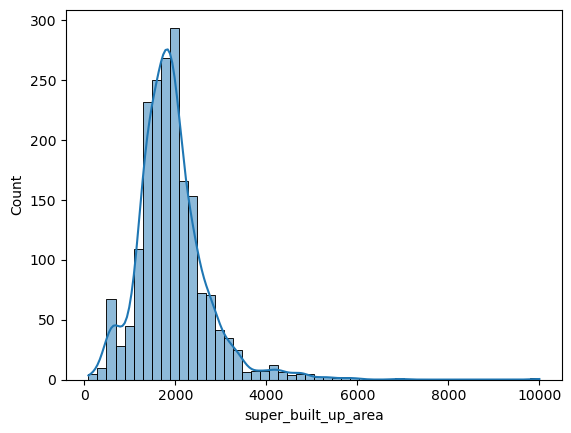

In [139]:
sns.histplot(data['super_built_up_area'].dropna(),bins = 50 , kde = True)

<Axes: xlabel='super_built_up_area'>

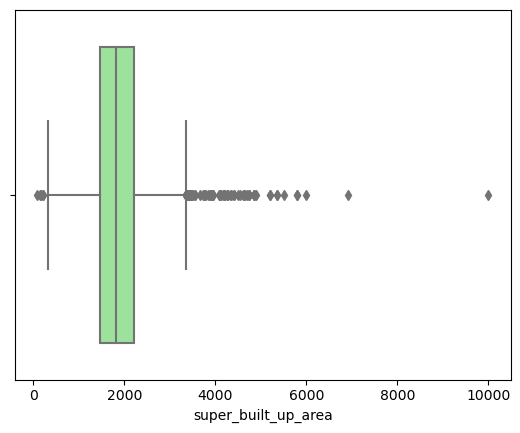

In [144]:
sns.boxplot( x = data['super_built_up_area']  , color = 'lightgreen')

In [145]:
data['built_up_area'].isnull().sum()

2054

In [146]:
data['built_up_area'].describe()

count       943.000000
mean       2488.303403
std       23960.604418
min          97.000000
25%        1275.265000
50%        1616.000000
75%        2000.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

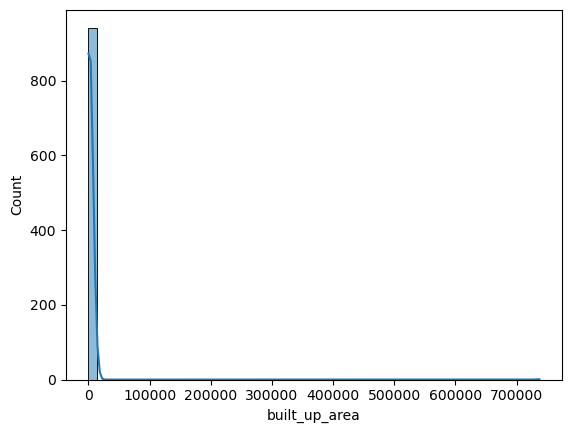

In [147]:
sns.histplot(data['built_up_area'].dropna(),bins = 50 , kde = True)

<Axes: xlabel='built_up_area'>

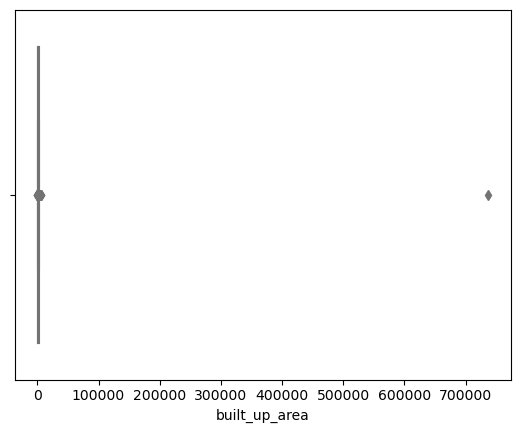

In [148]:
sns.boxplot( x = data['built_up_area']  , color = 'lightgreen')

In [149]:
data['carpet_area'].isnull().sum()

1178

In [150]:
data['carpet_area'].describe()

count      1819.000000
mean       2545.586535
std       23122.593570
min          66.000000
25%         872.500000
50%        1300.000000
75%        1763.865000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

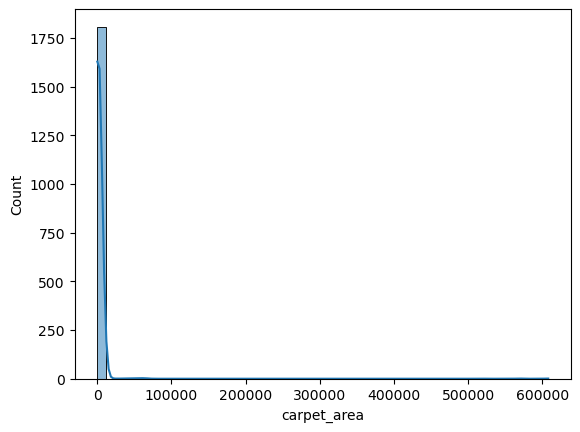

In [151]:
sns.histplot(data['carpet_area'].dropna(),bins = 50 , kde = True)

<Axes: xlabel='carpet_area'>

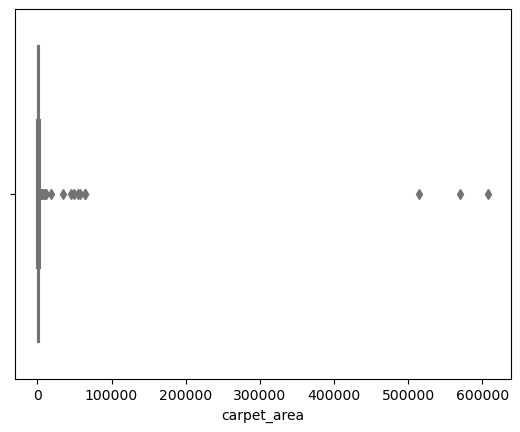

In [152]:
sns.boxplot( x = data['carpet_area']  , color = 'lightgreen')

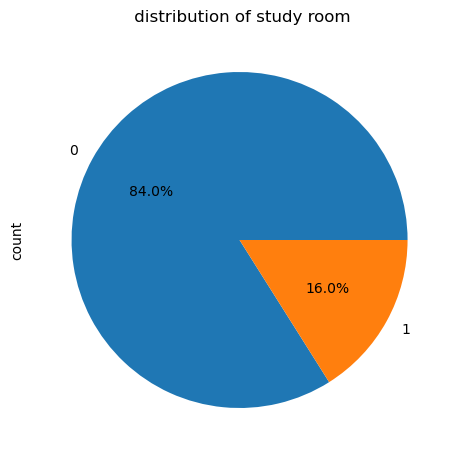

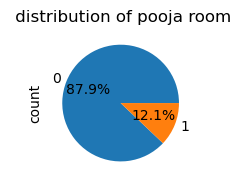

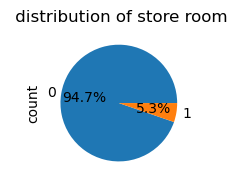

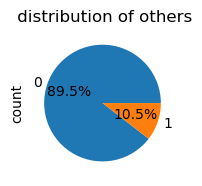

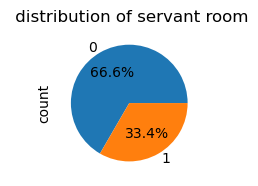

In [168]:
plt.figure(figsize = (20,12))

for i in ['study room','pooja room','store room','others','servant room']:
    
    ax = plt.subplot(2,3,2)
    
    data[i].value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , ax = ax)
    plt.title(f' distribution of {i}')
    plt.show()
    

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2997 non-null   int64  
 1   index                2997 non-null   int64  
 2   property_name        2997 non-null   object 
 3   society              2996 non-null   object 
 4   price                2996 non-null   float64
 5   price_per_sqft       2996 non-null   float64
 6   areaWithType         2997 non-null   object 
 7   bedRoom              2997 non-null   int64  
 8   bathroom             2997 non-null   int64  
 9   balcony              2997 non-null   int64  
 10  address              2991 non-null   object 
 11  floorNum             2989 non-null   float64
 12  facing               2123 non-null   object 
 13  agePossession        2997 non-null   object 
 14  nearbyLocations      2906 non-null   object 
 15  description          2997 non-null   o

In [160]:
data.iloc[: , 22:]

,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,1,0,0,0,0,0
9,0,0,0,0,1,0


In [170]:
data['furnished_type'].value_counts()

furnished_type
0    2014
1     826
2     157
Name: count, dtype: int64